#### evaluate the prediction performance of the trained model

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

confusion_matrix
 [[935  91]
 [ 68 894]]
accuracy:0.920020120724346
precision:0.9076142131979695
recall:0.9293139293139293
f1-score:0.9183359013867489


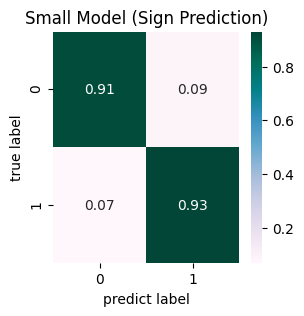

In [2]:
# load datasets
y_true = np.load('../model/pred_results/small_label.npy')
y_pred = np.load('../model/pred_results/small_predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
sns.heatmap(new_obj, fmt='.2f', cmap='PuBuGn', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.title('Small Model (Sign Prediction)')
plt.savefig('images/performance/cm-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.9687301373634158


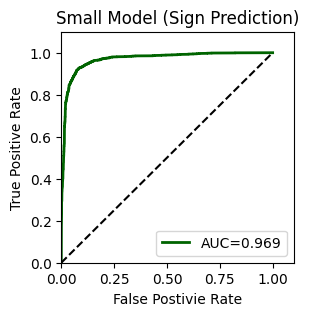

In [3]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)
ax = plt.subplots(figsize=(3,3))
plt.title('Small Model (Sign Prediction)')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb,color='#006400')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/performance/auc-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

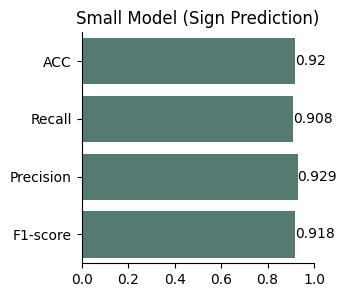

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(3,3))
ax = sns.barplot(y=[0,1,2,3], x=[0.920,0.908,0.929,0.918],color='#014C3B',orient="h",alpha=0.7)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_yticklabels(labels = ["ACC", "Recall", "Precision", "F1-score"],fontsize = 10) 
plt.xlim((0, 1))

sns.despine()
plt.title('Small Model (Sign Prediction)')
plt.savefig('images/performance/bar-small.png',dpi=300, bbox_inches = 'tight')
plt.show()

confusion_matrix
 [[1238  260]
 [ 233 1301]]
accuracy:0.837401055408971
precision:0.8334401024983985
recall:0.848109517601043
f1-score:0.8407108239095316


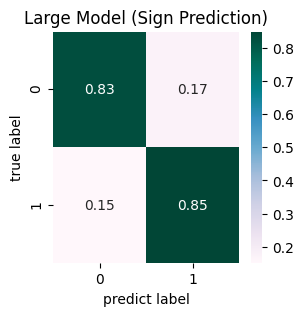

In [5]:
# load datasets
y_true = np.load('../model/pred_results/large_label.npy')
y_pred = np.load('../model/pred_results/large_predict.npy')

y_score = y_pred.argmax(axis=1)       
test_label = y_true.argmax(axis=1)                         
y_score_pro = y_pred # (212, 2)
y_one_hot = y_true
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(test_label, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(test_label, y_score)))
print('precision:{}'.format(precision_score(test_label, y_score)))
print('recall:{}'.format(recall_score(test_label, y_score)))
print('f1-score:{}'.format(f1_score(test_label, y_score)))

# update confusion matrix
sum_all1 = obj1[0][0] + obj1[0][1]
sum_all2 = obj1[1][0] + obj1[1][1]
new_obj = np.array(
    [
        [float(obj1[0][0])/sum_all1, float(obj1[0][1])/sum_all1],
        [float(obj1[1][0])/sum_all2, float(obj1[1][1])/sum_all2]
    ]
)
ax = plt.subplots(figsize=(3,3))
plt.title('Large Model (Sign Prediction)')
sns.heatmap(new_obj, fmt='.2f', cmap='PuBuGn', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.savefig('images/performance/cm-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

AUC :  0.9182621518229475


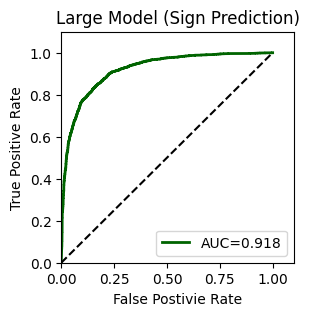

In [6]:
from sklearn.metrics import roc_curve, auc
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)
ax = plt.subplots(figsize=(3,3))
plt.title('Large Model (Sign Prediction)')
plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb,color='#006400')
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('images/performance/auc-large.png',dpi=300, bbox_inches = 'tight')
plt.show()

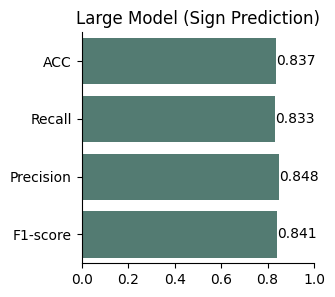

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(3,3))
ax = sns.barplot(y=[0,1,2,3], x=[0.837,0.833,0.848,0.841],color='#014C3B',orient="h",alpha=0.7)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_yticklabels(labels = ["ACC", "Recall", "Precision", "F1-score"],fontsize = 10) 
plt.xlim((0, 1))

sns.despine()
plt.title('Large Model (Sign Prediction)')
plt.savefig('images/performance/bar-large.png',dpi=300, bbox_inches = 'tight')
plt.show()